In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

## Standard AIMD

In [2]:
def AIMD(a1=1, a2=1, b1=0.5, b2=0.5, iters=100):
    ITERATESMAX = iters # You can adjust this value as needed
    C = 10 # Adjust C value as needed

    x1 = 8
    x2 = 1

    x1_values = np.zeros(ITERATESMAX)
    x2_values = np.zeros(ITERATESMAX)

    for i in range(ITERATESMAX):
        if (x1 + x2 <= C):
            # Additive increase phase
            print('Additive I')
            x1 = x1 + a1
            x2 = x2 + a2
        else:
            # Simulate network condition (for example, congestion)
            print('Multiplicative D')
            beta1 = b1
            beta2 = b2
            x1 = x1 * b1
            x2 = x2 * b2
        # Store values in arrays
        x1_values[i] = x1
        x2_values[i] = x2
    # Display the final values
    print("Final x1:", x1)
    print("Final x2:", x2)
    
    # calculate fairness vector
    fairness_vector = [a1/(1-b1), a2/(1-b2)]
    
    return x1_values, x2_values, fairness_vector

In [3]:
def plotAIMD(x1_values, x2_values, fairness_vector, title):
    # convert fairness vector into coordinates of line
    fairness_coords = [[0, x] for x in fairness_vector]
    # plot allocations of users
    plt.plot(x1_values, x2_values, '-o')
    # plot fairness line, scale line by 10 times to extend the vector
    plt.plot([x*10 for x in fairness_coords[0]], [x*10 for x in fairness_coords[1]],label='Fairness line')
    # plot maximum capacity line
    plt.plot([0,10],[10,0], label='Max Capacity')
    
    plt.legend()
    plt.title(title)
    plt.xlabel("User 1's allocation x1")
    plt.ylabel("User 2's allocation x2")
    plt.xlim([0, 12])
    plt.ylim([0, 12])

    plt.show()

In [4]:
x1_values, x2_values, fairness_vector = AIMD()

Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I


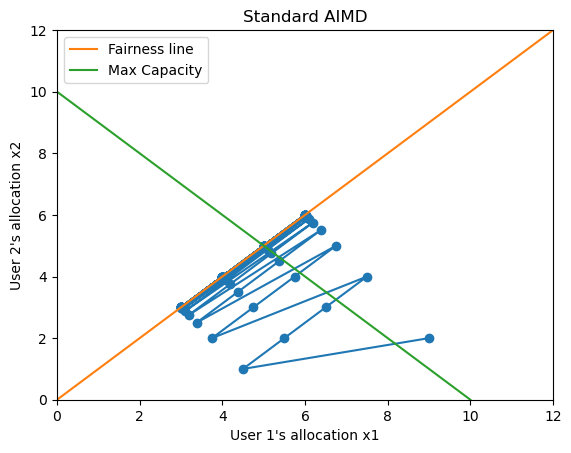

In [5]:
plotAIMD(x1_values, x2_values, fairness_vector,title="Standard AIMD")

In [51]:
x1_values, x2_values, fairness_vector = AIMD(4,2,0.3,0.5)

Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Multi

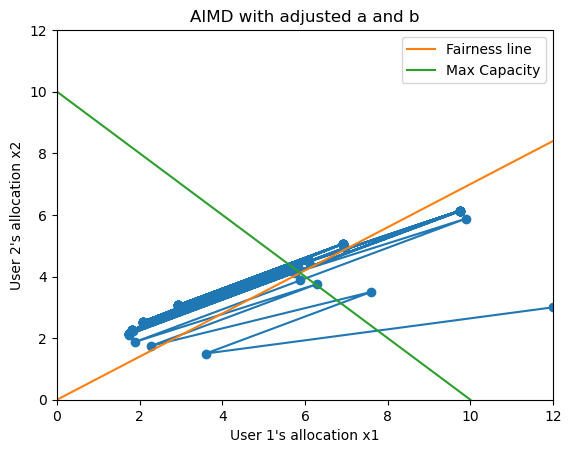

In [52]:
plotAIMD(x1_values, x2_values, fairness_vector, title="AIMD with adjusted a and b")

## Non-linear Functions

### Power AI

a(w) = w<sup>e</sup> <br>

In [8]:
def AI_pow(b1=0.5, b2=0.5, e1=0.5, e2=1, iters=100):
    ITERATESMAX = iters # You can adjust this value as needed
    C = 10 # Adjust C value as needed

    x1 = 8
    x2 = 1

    x1_values = np.zeros(ITERATESMAX)
    x2_values = np.zeros(ITERATESMAX)

    for i in range(ITERATESMAX):
        if (x1 + x2 <= C):
            # Additive increase phase
            print('Additive I')
            x1 = x1 + (x1**e1)
            x2 = x2 + (x2**e2)
        else:
            # Simulate network condition (for example, congestion)
            print('Multiplicative D')
            x1 = x1 * b1
            x2 = x2 * b2
        # Store values in arrays
        x1_values[i] = x1
        x2_values[i] = x2
    # Display the final values
    print("Final x1:", x1)
    print("Final x2:", x2)
    
    return x1_values, x2_values

In [9]:
def plotAIMD_nonlinear(x1_values, x2_values, title):
    # plot allocations of users
    plt.plot(x1_values, x2_values, '-o')
    # plot maximum capacity line
    plt.plot([0,10],[10,0], label='Max Capacity')
    
    plt.legend()
    plt.title(title)
    plt.xlabel("User 1's allocation x1")
    plt.ylabel("User 2's allocation x2")
    plt.xlim([0, 12])
    plt.ylim([0, 12])

    plt.show()

In [10]:
x1_values, x2_values = AI_pow()

Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative 

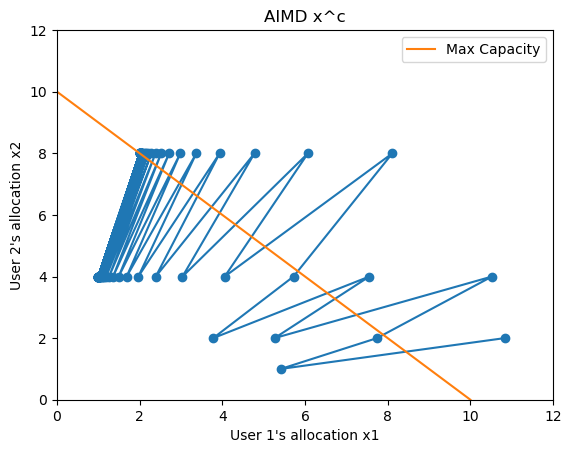

In [11]:
plotAIMD_nonlinear(x1_values, x2_values, title="AIMD x^c")

In [12]:
x1_values, x2_values = AI_pow(e1=0.1)

Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative 

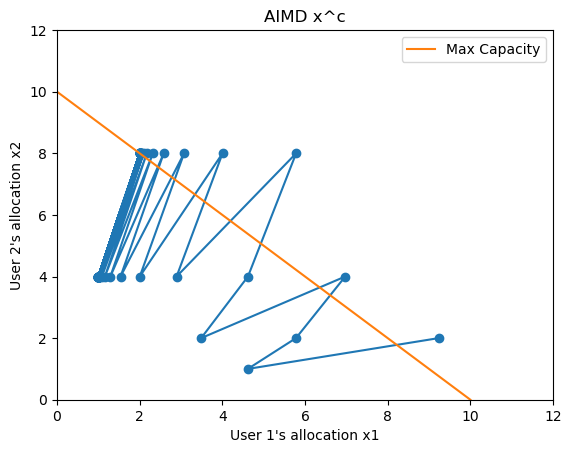

In [13]:
plotAIMD_nonlinear(x1_values, x2_values, title="AIMD x^c")

In [14]:
x1_values, x2_values = AI_pow(e1=0.1, e2=0.1)

Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplica

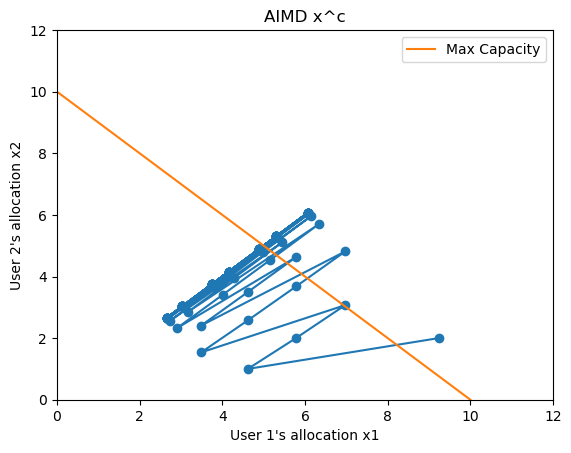

In [15]:
plotAIMD_nonlinear(x1_values, x2_values, title="AIMD x^c")

### Power AIMD

a(w) = w<sup>e</sup> <br>
b(w) = (1/w<sup>e</sup>)

In [16]:
def AIMD_pow(e1=0.5, e2=1, iters=100):
    ITERATESMAX = iters # You can adjust this value as needed
    C = 10 # Adjust C value as needed

    x1 = 5
    x2 = 1

    x1_values = np.zeros(ITERATESMAX)
    x2_values = np.zeros(ITERATESMAX)

    for i in range(ITERATESMAX):
        if (x1 + x2 <= C):
            # Additive increase phase
            print('Additive I')
            x1 = x1 + x1**e1
            x2 = x2 + x2**e2
        else:
            # Simulate network condition (for example, congestion)
            print('Multiplicative D')
#             print('x1=',x1)
#             print('x1 * ', 1/(x1**e1))
            x1 = x1 * 1/(x1**e1)
            x2 = x2 * 1/(x2**e2)
        # Store values in arrays
        x1_values[i] = x1
        x2_values[i] = x2
    # Display the final values
    print("Final x1:", x1)
    print("Final x2:", x2)
    
    return x1_values, x2_values

In [17]:
x1_values, x2_values = AIMD_pow()

Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Mul

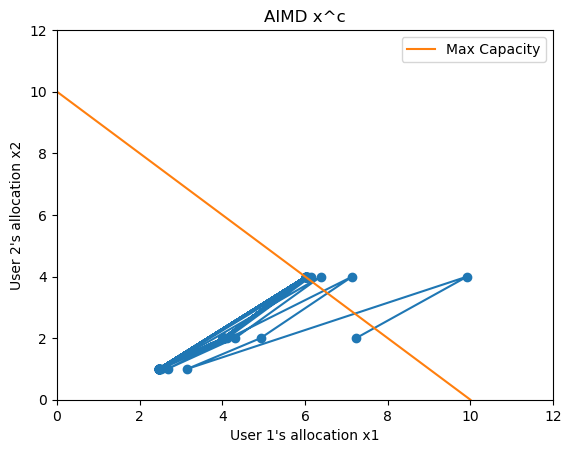

In [18]:
plotAIMD_nonlinear(x1_values, x2_values, title="AIMD x^c")

In [19]:
x1_values, x2_values = AIMD_pow(e1=0.5, e2=0.5)

Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Mul

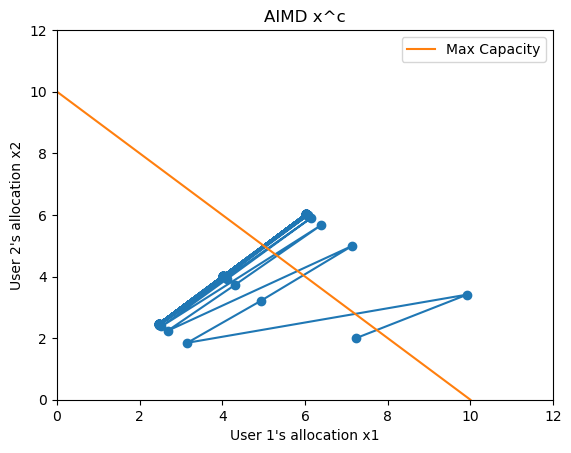

In [20]:
plotAIMD_nonlinear(x1_values, x2_values, title="AIMD x^c")

In [21]:
x1_values, x2_values = AIMD_pow(e1=0.1, e2=0.1)

Additive I
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicativ

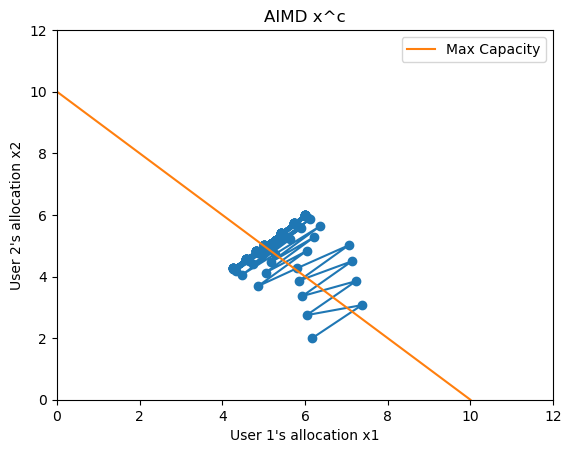

In [22]:
plotAIMD_nonlinear(x1_values, x2_values, title="AIMD x^c")

## Log AI

In [23]:
def AI_log(a1=1, a2=1, b1=0.5, b2=0.5, iters=100):
    ITERATESMAX = iters # You can adjust this value as needed
    C = 10 # Adjust C value as needed

    x1 = 5
    x2 = 1

    x1_values = np.zeros(ITERATESMAX)
    x2_values = np.zeros(ITERATESMAX)

    for i in range(ITERATESMAX):
        if (x1 + x2 <= C):
            # Additive increase phase
            print('Additive I')
            x1 = x1 + np.log(x1 + 1)
            x2 = x2 + np.log(x2 + 1)
        else:
            # Simulate network condition (for example, congestion)
            print('Multiplicative D')
            x1 = x1 * b1
            x2 = x2 * b2
        # Store values in arrays
        x1_values[i] = x1
        x2_values[i] = x2
    # Display the final values
    print("Final x1:", x1)
    print("Final x2:", x2)
    
    return x1_values, x2_values

In [24]:
x1_values, x2_values = AI_log()

Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Mul

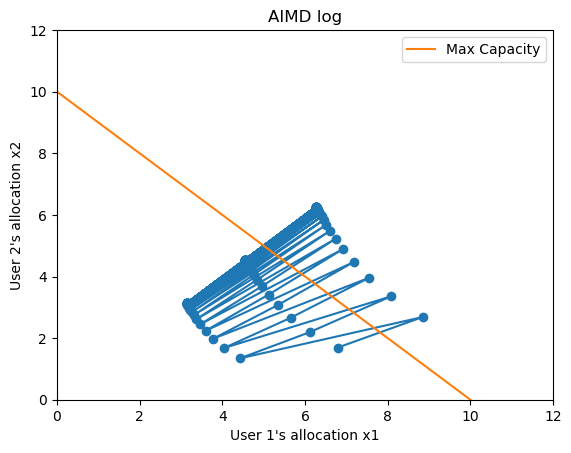

In [25]:
plotAIMD_nonlinear(x1_values, x2_values, title="AIMD log")

## Log AIMD

In [26]:
def AIMD_log(a1=1, a2=1, b1=0.5, b2=0.5, iters=100):
    ITERATESMAX = iters # You can adjust this value as needed
    C = 10 # Adjust C value as needed

    x1 = 5
    x2 = 1

    x1_values = np.zeros(ITERATESMAX)
    x2_values = np.zeros(ITERATESMAX)

    for i in range(ITERATESMAX):
        if (x1 + x2 <= C):
            # Additive increase phase
            print('Additive I')
            x1 = x1 + np.log(x1 + 1)
            x2 = x2 + np.log(x2 + 1)
        else:
            # Simulate network condition (for example, congestion)
            print('Multiplicative D')
            x1 = x1 * 1/np.log(x2 + 1)
            x2 = x2 * 1/np.log(x2 + 1)
        # Store values in arrays
        x1_values[i] = x1
        x2_values[i] = x2
    # Display the final values
    print("Final x1:", x1)
    print("Final x2:", x2)
    
    return x1_values, x2_values

In [27]:
x1_values, x2_values = AIMD_log()

Additive I
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Ad

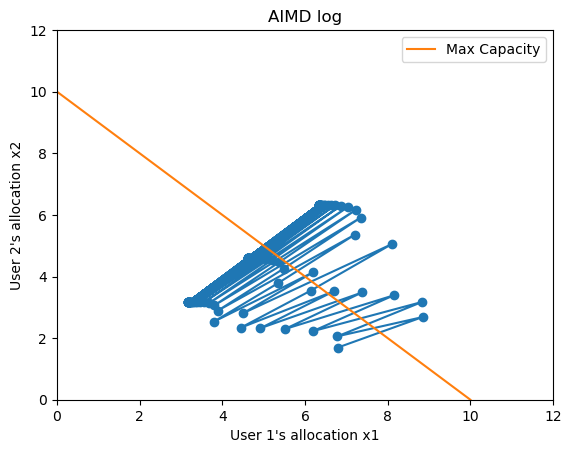

In [28]:
plotAIMD_nonlinear(x1_values, x2_values, title="AIMD log")

## AIMD Exponential

In [29]:
def AI_exp(a1=5, a2=5, b1=0.5, b2=0.5, e1=1.2, e2=1.2, iters=100):
    ITERATESMAX = iters # You can adjust this value as needed
    C = 10 # Adjust C value as needed

    x1 = 5
    x2 = 1

    x1_values = np.zeros(ITERATESMAX)
    x2_values = np.zeros(ITERATESMAX)

    for i in range(ITERATESMAX):
        if (x1 + x2 <= C):
            # Additive increase phase
            print('Additive I')
            x1 = x1 + e1**x1
            x2 = x2 + e2**x2
        else:
            # Simulate network condition (for example, congestion)
            print('Multiplicative D')
            x1 = x1 * 1/(e1**x1)
            x2 = x2 * 1/(e2**x2)
        # Store values in arrays
        x1_values[i] = x1
        x2_values[i] = x2
    # Display the final values
    print("Final x1:", x1)
    print("Final x2:", x2)
    
    return x1_values, x2_values

In [30]:
x1_values, x2_values = AI_exp()

Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Multiplicative D
Additive I
Add

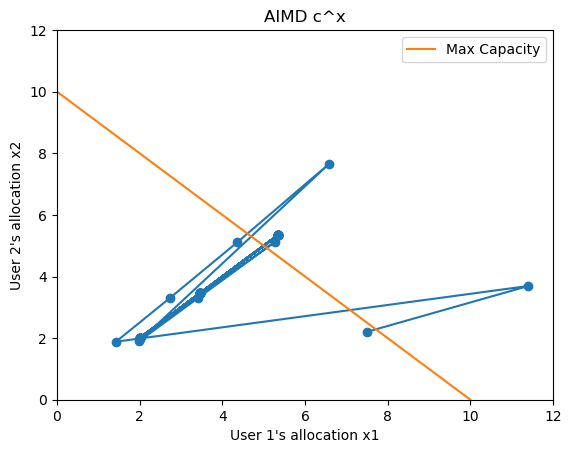

In [31]:
plotAIMD_nonlinear(x1_values, x2_values, title="AIMD c^x")

In [32]:
def AIMD_sigm(a1=5, a2=5, b1=0.5, b2=0.5, e1=1.2, e2=1.2, iters=100):
    ITERATESMAX = iters # You can adjust this value as needed
    C = 10 # Adjust C value as needed

    x1 = 5
    x2 = 1

    x1_values = np.zeros(ITERATESMAX)
    x2_values = np.zeros(ITERATESMAX)

    for i in range(ITERATESMAX):
        if (x1 + x2 <= C):
            # Additive increase phase
            print('Additive I')
            x1 = x1 + e1**x1
            x2 = x2 + e2**x2
        else:
            # Simulate network condition (for example, congestion)
            print('Multiplicative D')
            x1 = x1 * 1/(1+e1**x1)
            x2 = x2 * 1/(1+e2**x2)
        # Store values in arrays
        x1_values[i] = x1
        x2_values[i] = x2
    # Display the final values
    print("Final x1:", x1)
    print("Final x2:", x2)
    
    return x1_values, x2_values

In [33]:
x1_values, x2_values = AIMD_sigm()

Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I


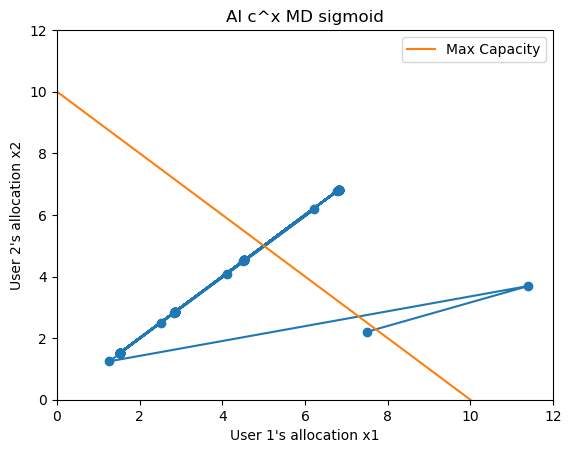

In [34]:
plotAIMD_nonlinear(x1_values, x2_values, title="AI c^x MD sigmoid")

## Standard AIMD on multiple users

In [173]:
def plotCwndRTT(userCwnd=[5,1,2], iter=100):
    C=160
    cwndTotal = [sum(userCwnd)]
    userCwnd_all = [userCwnd]

    for i in range(iter):
        if cwndTotal[i] <= C:
            userCwnd = [x+1 for x in userCwnd]
        else:
            userCwnd = [math.floor(x/2) for x in userCwnd]
        userCwnd_all.append(userCwnd)
        cwndTotal.append(sum(userCwnd))
    
    res = [list(x) for x in zip(*userCwnd_all)]
    
    for y in res:
        x = list(range(iter+1))
        plt.plot(x, y, '-o')
        
    plt.xlabel("RTT")
    plt.ylabel("CWND")
    plt.title(f"RTT vs CWND")
    plt.show()

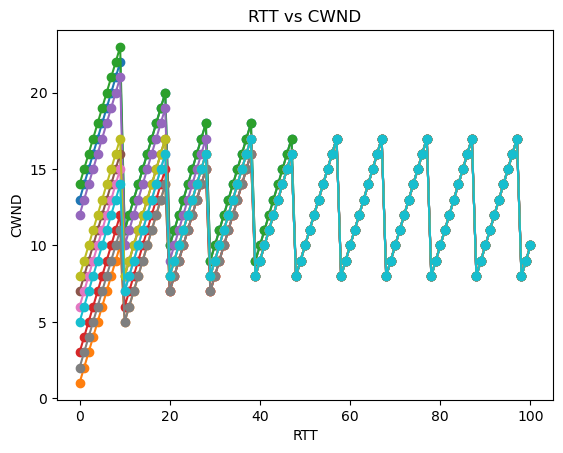

In [174]:
userCwnd = random.sample(range(1, 15), 10)
plotCwndRTT(userCwnd)

## Power AIMD on multiple users

In [175]:
def plotCwndRTT(userCwnd=[5,1,2], iter=100):
    C=160
    cwndTotal = [sum(userCwnd)]
    userCwnd_all = [userCwnd]

    for i in range(iter):
        if cwndTotal[i] <= C:
            userCwnd = [math.floor(x+x**0.3) for x in userCwnd]
        else:
            userCwnd = [math.floor(x/x**0.3) for x in userCwnd]
        userCwnd_all.append(userCwnd)
        cwndTotal.append(sum(userCwnd))
    
    res = [list(x) for x in zip(*userCwnd_all)]
    
    for y in res:
        x = list(range(iter+1))
        plt.plot(x, y, '-o')
        
    plt.xlabel("RTT")
    plt.ylabel("CWND")
    plt.title(f"RTT vs CWND")
    plt.show()

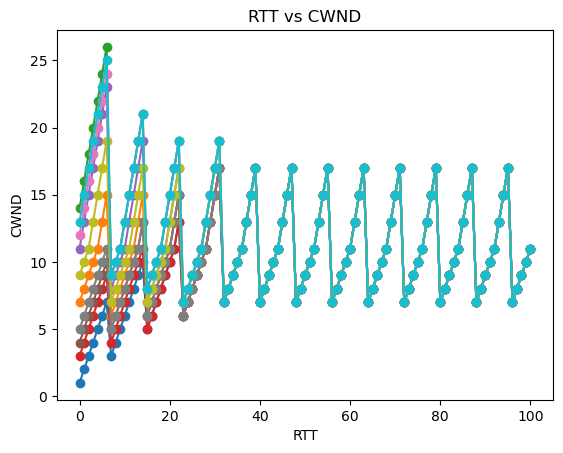

In [176]:
userCwnd = random.sample(range(1, 15), 10)
plotCwndRTT(userCwnd)

## Log AIMD on multiple users

In [177]:
def plotCwndRTT(userCwnd=[5,1,2], iter=100):
    C=160
    cwndTotal = [sum(userCwnd)]
    userCwnd_all = [userCwnd]

    for i in range(iter):
        if cwndTotal[i] <= C:
            userCwnd = [math.floor(x+np.log(x+1)) for x in userCwnd]
        else:
            userCwnd = [math.floor(x/np.log(x+1)) for x in userCwnd]
        userCwnd_all.append(userCwnd)
        cwndTotal.append(sum(userCwnd))
    
    res = [list(x) for x in zip(*userCwnd_all)]
    
    for y in res:
        x = list(range(iter+1))
        plt.plot(x, y, '-o')
        
    plt.xlabel("RTT")
    plt.ylabel("CWND")
    plt.title(f"RTT vs CWND")
    plt.show()

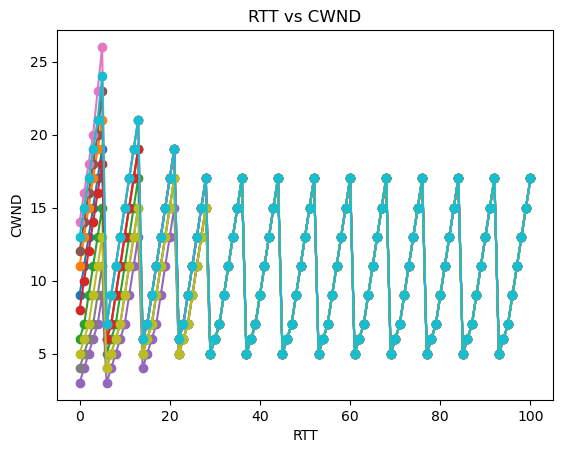

In [178]:
userCwnd = random.sample(range(2, 15), 10)
plotCwndRTT(userCwnd)

## Exponential AIMD

In [179]:
def plotCwndRTT(userCwnd=[5,1,2], iter=100):
    C=160
    cwndTotal = [sum(userCwnd)]
    userCwnd_all = [userCwnd]

    for i in range(iter):
        if cwndTotal[i] <= C:
            userCwnd = [math.floor(x+1.2**x) for x in userCwnd]
        else:
            userCwnd = [math.floor(x/1.2**x) for x in userCwnd]
        userCwnd_all.append(userCwnd)
        cwndTotal.append(sum(userCwnd))
    
    res = [list(x) for x in zip(*userCwnd_all)]
    
    for y in res:
        x = list(range(iter+1))
        plt.plot(x, y, '-o')
        
    plt.xlabel("RTT")
    plt.ylabel("CWND")
    plt.title(f"RTT vs CWND")
    plt.show()

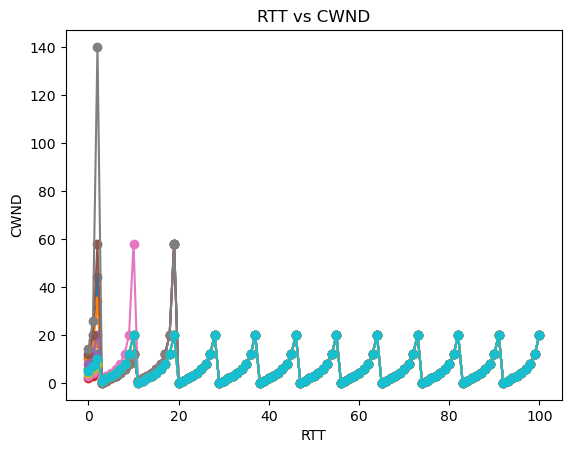

In [180]:
userCwnd = random.sample(range(2, 15), 10)
plotCwndRTT(userCwnd)